In [1]:
import os
import numpy as np
import math 
import matplotlib.pyplot as plt

In [2]:
list_data_x = []
list_data_dx = []
list_data_dy = []

In [3]:
N_SDR = 8
list_particle_number = []
for i in range(1,N_SDR+1):
    if i < 10:
        list_particle_number.append(("0"+str(i)))
    else:
        list_particle_number.append((str(i)))

In [4]:
#----------------------------
# 2. FLAC model parameters
#----------------------------
num_particles = 600        #number of particles for each SDR
time_steps = 400           #total FLAC model steps
dt_step = 20.*1000 #[yr] FLAC time step for data output
yr_in_Myr = 10.**6 #[yr]

Time_compare = .1 # [Myr]

for i in range(N_SDR):
    particle_number = list_particle_number[i]

    #----------------------------
    # 1. for getting FLAC data
    #----------------------------
    Plate_thickness = "15"     # Hd in the model
    # particle_number = "02"     # which SDR particle
    
    # Get data from FLAC
    #----------------------------
    FLAC_file_path=("/Users/Tian/Documents/Thesis/Vts_data/TianHe2/20180112-Davis_2017_rheo-BC700C-dike_through-Nu3_6_10km_600C/BC900_plag-rem")
    #FLAC_file_path=("/Users/Tian/Documents/Thesis"
    #                "/Vts_data/TianHe2/20170920/H"
    #                +Plate_thickness+"-withHealing")

    FLAC_data = open(FLAC_file_path+"/particles_"+particle_number+".0",'rb')
    data = np.fromfile(FLAC_data, dtype=np.single)
    FLAC_data.close()
    data_matrix = data.reshape((num_particles, 2, time_steps), order='F')
    data_matrix_x = data_matrix[:,0,:]
    data_matrix_y = data_matrix[:,1,:]

    data_dy = np.zeros(len(data_matrix_x[:,1]))
    data_dx = np.zeros(len(data_matrix_x[:,1]))
    data_x_dt = np.zeros(len(data_matrix_x[:,1]))


    time_data_comparison = Time_compare * yr_in_Myr 
    #[yr]  compare data at 1 Myr  (relative time, for SDR 10 at 10Myr is when it experience 1Myr of load)
    TIME = float(particle_number) + Time_compare - 1. 
    steps = int(np.ceil(TIME * yr_in_Myr / dt_step)) # the step in FLAC correspond to time_data_comparison
    steps_dt = steps + 1
    
    # fetch useful data at corresponding time
    print(steps)
    data_x = data_matrix_x[1:,steps]
    data_y = data_matrix_y[1:,steps]
    print(steps_dt)
    data_x_dt = data_matrix_x[1:,steps_dt]
    data_y_dt = data_matrix_y[1:,steps_dt]

    data_dy = data_y_dt - data_y
    data_dx = data_x_dt - data_x
    data_x_dt = data_x_dt
    
    list_data_x.append(data_x_dt[:])
    list_data_dx.append(data_dx[:])
    list_data_dy.append(data_dy[:])

6
7
55
56
105
106
155
156
205
206
255
256
305
306
355
356


In [5]:
122400/1200

102.0

In [6]:
FLAC_file_path

'/Users/Tian/Documents/Thesis/Vts_data/TianHe2/20180112-Davis_2017_rheo-BC700C-dike_through-Nu3_6_10km_600C/BC900_plag-rem'

In [7]:
list_data_x[0][1]

3.6346622

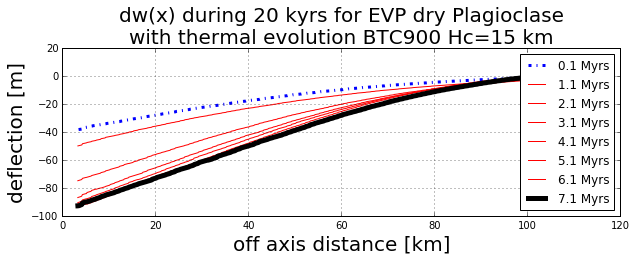

In [8]:
resources_path="/Users/Tian/Documents/Thesis_Columbia/!SDR_manuscript/manuscript-2018/figures/resources/"
fig = plt.gcf()
fig.set_size_inches(10, 3)

for i in range(N_SDR):
    #plt.plot(list_data_x[i],list_data_dy[i]*1000)
    if(i==0):
        plt.plot(list_data_x[i][:],list_data_dy[i][:]*1000,"b-.",linewidth="3",label="%d.1 Myrs"%i)
    elif(i==N_SDR-1):
        plt.plot(list_data_x[i][:],list_data_dy[i][:]*1000,"k-",linewidth="5",label="%d.1 Myrs"%i)
    else:
        plt.plot(list_data_x[i][:],list_data_dy[i][:]*1000,"r-",linewidth="1",label="%d.1 Myrs"%i)
plt.legend()
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

plt.grid()
plt.title("dw(x) during 20 kyrs for EVP dry Plagioclase\n"
          "with thermal evolution BTC900 Hc=15 km",fontsize=20)
plt.xlabel("off axis distance [km]",fontsize=20)
plt.ylabel("deflection [m]",fontsize=20)
plt.show()
fig.savefig(resources_path+'nonNewtonian_EVP-plag-thermal-BTC900.pdf', dpi=300)

![alt text](BC700C-linT-demf0508-Nu3_6_10km_600C.png "Title")

<img src="BC700C-linT-demf0508-Nu3_6_10km_600C.png">

In [9]:
pwd

'/Users/Tian/Documents/Thesis/Vts_data/TianHe2/20170920/python-scripts'

In [10]:
#for i in range(5,10):
    #plt.plot(list_data_x[i],list_data_dy[i])
#fig0,=plt.plot(list_data_x[0],list_data_dy[0],label="0")
#fig1,=plt.plot(list_data_x[3],list_data_dy[3],label="3")
fig2,=plt.plot(list_data_x[4],list_data_dy[4],label="5Myr")
fig3,=plt.plot(list_data_x[5],list_data_dy[5],label="6Myr")
#fig4,=plt.plot(list_data_x[1],list_data_dy[1],label="1")
#plt.plot(list_data_x[7],list_data_dy[7])
plt.legend()

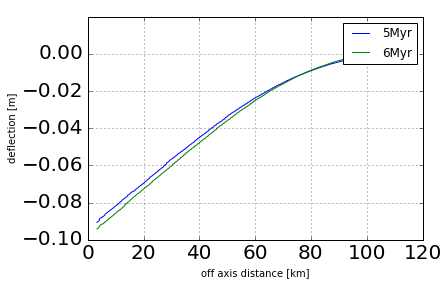

In [11]:
plt.grid()
plt.xlabel("off axis distance [km]")
plt.ylabel("deflection [m]")
plt.show()

In [12]:
len(list_data_dy)

8

In [13]:
xx = [item[2] for item in list_data_x]

In [14]:
# calculate the average x locations of the SDRs that is nearest to axis
xx_avg = sum(xx)/len(xx)*1000.
xx_avg

3668.1099832057953

In [15]:
dw0 = [item[2] for item in list_data_dy]

In [16]:
dw0 = np.array(dw0)

In [17]:
dw0*1000

array([-38.0198822 , -49.63825607, -74.57098389, -86.59889984,
       -90.27728271, -93.82933044, -91.3159256 , -92.6105957 ], dtype=float32)

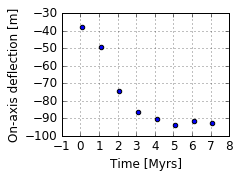

In [18]:
fig = plt.gcf()
fig.set_size_inches(3, 2.2)
import matplotlib
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=12)

plt.scatter(([0.1,1.1,2.1,3.1,4.1,5.1,6.1,7.1]), dw0*1000)
plt.grid()
plt.xlabel("Time [Myrs]", fontsize=12)
plt.ylabel("On-axis deflection [m]", fontsize=12)
plt.show()
fig.savefig(resources_path+'nonNewtonian_EVP-plag-thermal-BTC900-axis.pdf', dpi=300)

In [19]:
# take the steady dw0 and calc the average (from 3)
N_steady = 4 # from the figure plot
dw0_avg = sum(dw0[N_steady:]) / len(dw0[N_steady:]) * 1000
dw0_avg

-92.008285224437714

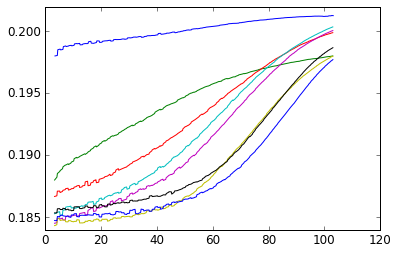

In [20]:
for i in range(N_SDR):
    plt.plot(list_data_x[i],list_data_dx[i])
plt.show()

In [21]:
int(Plate_thickness)*1000.

15000.0

In [22]:
# H5MPa = 23 km

In [23]:
# compare with analytic results
Hd = int(23)*1000.;              #[m] height of the dike
Te = int(15)*1000.;              #[m] effective plate thickness
g = 10.;                 #[m/s**2] gravitational acceleration
rho_d = 3000.;           #[kg/m**3] density of the solidified dike
rho_f = 2800.;           #[kg/m**3] density of the fluid dike
delta_rho_d = rho_d - rho_f;
rho_i_sedi = 2300.;
rho_i = 2800.;           #[kg/m**3] density of the infill
rho_c = 3000.;           #[kg/m**3] density of the underlying lower crust or mantle
sediment = 0;  # whether infill is sedi or lava  (1 means sedi)
if sediment == 1:
    delta_rho_c = rho_c - rho_i_sedi;
else:
    delta_rho_c = rho_c - rho_i;


E = 7.5 * 10.**10.;          #[Pa] Young's modulus; for lame constants of 30GPa
mu = 0.25;              # Poisson's ratio
D = (E * Te**3.) / (12 * (1 - mu**2.)); #[N*m] Flexural rigidity
alpha = (4. * D / (delta_rho_c * g))**0.25;#[m] Flexural wavelength
dx = dt_step / yr_in_Myr * 10. * 1000.  # [m] width of dike injection within one dt of 20kyr
dV_0 = dx * g * Hd * delta_rho_d; #[N/m] volcanic line load due to denser dike
dW_0 = 2 * dV_0 / (alpha * g * delta_rho_c)

In [24]:
Hd

23000.0

In [25]:
Te

15000.0

In [26]:

dW_0

112.32713937886433

In [27]:
alpha

81903.625881272

In [28]:
np.exp(-xx_avg / alpha)* np.cos(xx_avg / alpha)

0.95524359364198275

In [29]:
dw0_avg

-92.008285224437714

In [30]:
# # using scypy to solve
# import sympy as sp
# from sympy.solvers import solve
# from sympy import Symbol
# alpha_n = Symbol('alpha_n')
# eq = dw0_avg - 2 * dV_0 / (alpha_n * g * delta_rho_c) \
#     * sp.exp(-xx_avg / alpha_n) * sp.cos(xx_avg / alpha_n)
# solve(eq, alpha_n)

In [31]:
dw0_avg

-92.008285224437714

In [32]:
xx_avg

3668.1099832057953

In [33]:
dV_0

9200000000.0

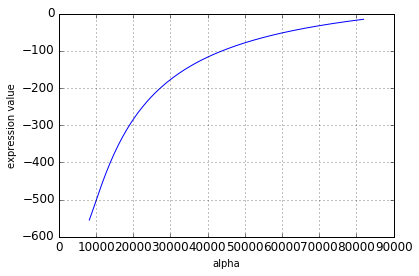

In [34]:
from scipy.optimize import fsolve
func = lambda alpha_n: \
        -dw0_avg - 2 * dV_0 / (alpha_n * g * delta_rho_c) \
         * np.exp(-xx_avg / alpha_n) * np.cos(xx_avg / alpha_n)
#plot
# Plot it

alpha_n = np.linspace(alpha/10, alpha, 201)

plt.plot(alpha_n, func(alpha_n))
plt.xlabel("alpha")
plt.ylabel("expression value")
plt.grid()
plt.show()

alpha_n_initial_guess = alpha
alpha_n_solution = fsolve(func, alpha_n_initial_guess)

In [35]:
alpha_n_solution

array([ 96179.32886533])

In [36]:
Te_n = (alpha_n_solution / (E / (3*delta_rho_c*g*(1-mu**2)))**0.25)**(4/3.)

In [37]:
Te_n

array([ 18583.58125057])

In [38]:
5.2/15

0.3466666666666667

In [39]:
5.4/16

0.3375

In [40]:
5.6/18

0.3111111111111111

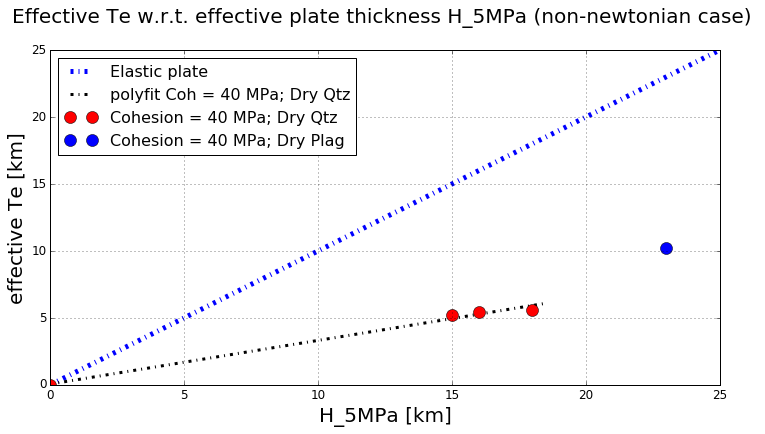

In [41]:
H = [0, 15, 16, 18, 23]
HH = [0,25]
Te = [0, 5.2, 5.4, 5.6, 10.2]
percentage = [34.67,33.75,31.11]

polyP = np.polyfit(H[:4],Te[:4],1)
polyP_func = np.poly1d(polyP)
xp = np.linspace(0,18.5,500)
Tep = polyP_func(xp)


fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.plot(HH,HH,'b-.',linewidth=5,label="Elastic plate")

plt.plot(xp,Tep,'k-.',linewidth=3,label="polyfit Coh = 40 MPa; Dry Qtz")
plt.plot(H[:4],Te[:4],'ro',markersize=12,label="Cohesion = 40 MPa; Dry Qtz" )
plt.plot(H[4],Te[4],'bo',markersize=12,label="Cohesion = 40 MPa; Dry Plag" )

import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

plt.title("Effective Te w.r.t. effective plate thickness H_5MPa (non-newtonian case) \n",fontsize=20)
plt.xlabel("H_5MPa [km]",fontsize=20)
plt.ylabel("effective Te [km]",fontsize=20)
plt.grid()
plt.axis([0,25, 0, 25])
plt.legend(loc=2,fontsize=16)
plt.show()

fig.savefig(resources_path+'nonNewtonian_EVP-thermal-Te_H5MPa-$.pdf', dpi=300)

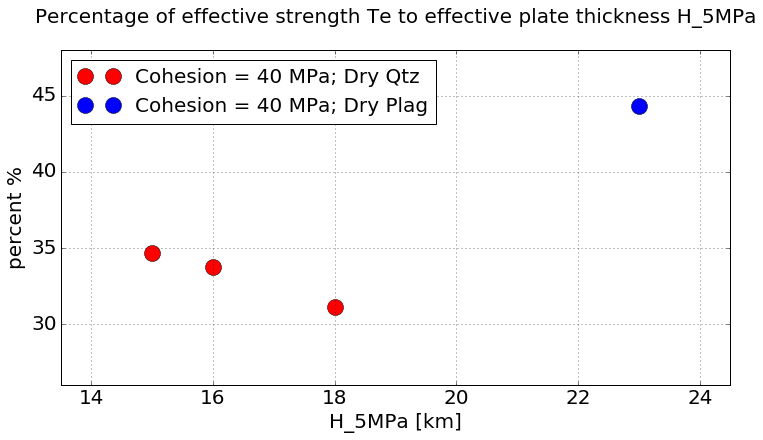

In [42]:
fig = plt.gcf()
fig.set_size_inches(12, 6)

#plt.plot(xp[200:],Tep[200:]/xp[200:]*100,'r-',linewidth=5,label="Cohesion = 40 MPa; Dry Qtz")
plt.plot(H[1:4],percentage,'ro',markersize=16,linewidth=5,label="Cohesion = 40 MPa; Dry Qtz")
plt.plot(H[4],Te[4]/H[4]*100,'bo',markersize=16,linewidth=5,label="Cohesion = 40 MPa; Dry Plag")
#plt.plot(xp[1:],TepC[1:]/xp[1:]*100,'r-.',linewidth=5,label="Cohesion = 40 MPa")
plt.title("Percentage of effective strength Te to effective plate thickness H_5MPa\n",fontsize=20)
plt.xlabel("H_5MPa [km]",fontsize=20)
plt.ylabel("percent %",fontsize=20)
plt.grid()
plt.axis([13.5,24.5, 26, 48])
plt.legend(loc=2,fontsize=20)
plt.show()

fig.savefig(resources_path+'nonNewtonian_EVP-thermal-Te_H5MPa_percentage-$.pdf', dpi=300)

In [43]:
help(np.polyfit)

Help on function polyfit in module numpy.lib.polynomial:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting polynomial
    rcond : float, optional
        Relative condition number of the fit. Singular values smaller than
        this relative to the largest singular value will be ignored. The
        default value is len(x)*eps, where eps is the

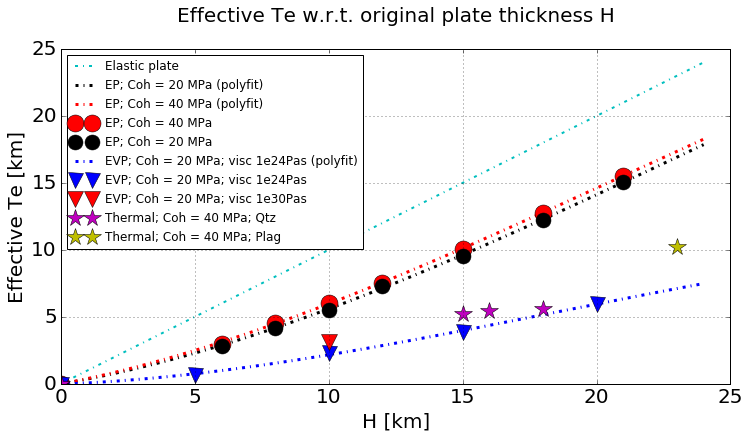

In [44]:
# Money figure all togher
# EP case
H = [0,6,8,10,12,15,18,21]
HH = [0,24]
Te = [0,2.832,4.164,5.545,7.325,9.530,12.243,15.076]
TeC = [0,2.992,4.547,6.062,7.558,10.073,12.754,15.552]
polyP = np.polyfit(H,Te,3)
polyP_func = np.poly1d(polyP)
polyPC = np.polyfit(H,TeC,3)
polyPC_func = np.poly1d(polyPC)
xp = np.linspace(0,24,500)
Tep = polyP_func(xp)
TepC = polyPC_func(xp)
#EVP const thermal
H_EVP = [0,5,10,15,20]
Te_EVP = [0,0.641,2.325,3.866,5.976]
polyP_EVP = np.polyfit(H_EVP,Te_EVP,3)
polyP_EVP_reverse = np.polyfit(Te_EVP,H_EVP,3)
polyP_func_EVP = np.poly1d(polyP_EVP)
polyP_func_EVP_reverse = np.poly1d(polyP_EVP_reverse)
Tep_EVP = polyP_func_EVP(xp)

#EVP-thermal
H_tm = [0, 15, 16, 18, 23]
Te_tm = [0, 5.2, 5.4, 5.6, 10.2]
percentage_tm = [34.67,33.75,31.11]

# plotting
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.plot(HH,HH,'c-.',linewidth=2,label="Elastic plate")

#plotting EP
plt.plot(xp,Tep,'k-.',linewidth=3,label="EP; Coh = 20 MPa (polyfit)")
plt.plot(xp,TepC,'r-.',linewidth=3,label="EP; Coh = 40 MPa (polyfit)")
plt.plot(H,TeC,'ro',markersize=17,label="EP; Coh = 40 MPa")
plt.plot(H,Te,'ko',markersize=15,label="EP; Coh = 20 MPa" )
#Plotting EVP_const therm
plt.plot(xp,Tep_EVP,'b-.',linewidth=3,label="EVP; Coh = 20 MPa; visc 1e24Pas (polyfit)")
plt.plot(H_EVP,Te_EVP,'bv',markersize=15,label="EVP; Coh = 20 MPa; visc 1e24Pas" )
plt.plot(10,3.1,'rv',markersize=16,label="EVP; Coh = 20 MPa; visc 1e30Pas" )
#plt.plot(15,4.416,'gv',markersize=15)
#Plotting EVP_thermal tm
plt.plot(H_tm[:4],Te_tm[:4],'m*',markersize=18,label="Thermal; Coh = 40 MPa; Qtz" )
plt.plot(H_tm[4],Te_tm[4],'y*',markersize=18,label="Thermal; Coh = 40 MPa; Plag" )

plt.title("Effective Te w.r.t. original plate thickness H\n",fontsize=20)
plt.xlabel("H [km]",fontsize=20)
plt.ylabel("Effective Te [km]",fontsize=20)
plt.grid()
plt.axis([0,25, 0, 25])
plt.legend(loc=2,fontsize=12)
plt.show()
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig.savefig(resources_path+'FINAL-$.pdf', dpi=300)

In [45]:
polyP_EVP_reverse

array([ 0.08607052, -1.02547055,  6.33363689,  0.46911615])

In [46]:
polyP_func_EVP_reverse(2)

9.7230719282002092

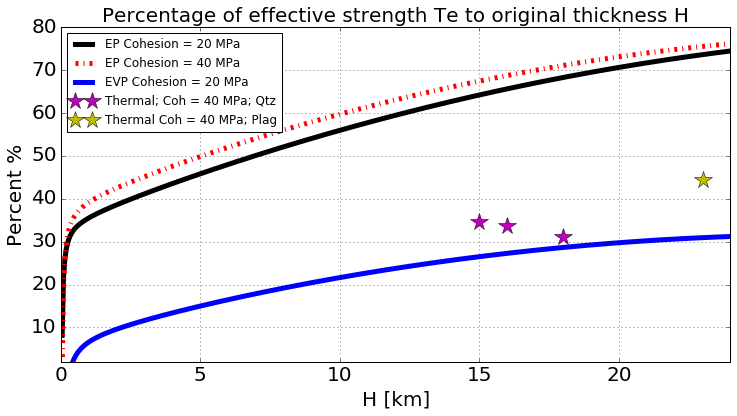

In [47]:
fig = plt.gcf()
fig.set_size_inches(12, 6)

plt.plot(xp[1:],Tep[1:]/xp[1:]*100,'k-',linewidth=5,label="EP Cohesion = 20 MPa")
plt.plot(xp[1:],TepC[1:]/xp[1:]*100,'r-.',linewidth=5,label="EP Cohesion = 40 MPa")
plt.plot(xp[1:],Tep_EVP[1:]/xp[1:]*100,'b-',linewidth=5,label="EVP Cohesion = 20 MPa")

plt.plot(H_tm[1:4],percentage_tm,'m*',markersize=18,linewidth=5,label="Thermal; Coh = 40 MPa; Qtz")
plt.plot(H_tm[4],Te_tm[4]/H_tm[4]*100,'y*',markersize=18,linewidth=5,label="Thermal Coh = 40 MPa; Plag")

plt.title("Percentage of effective strength Te to original thickness H",fontsize=20)
plt.xlabel("H [km]",fontsize=20)
plt.ylabel("Percent %",fontsize=20)
plt.grid()
plt.axis([0,24, 2, 80])
plt.legend(loc=2,fontsize=12)
plt.show()
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig.savefig(resources_path+'FINAL-$-percentage.pdf', dpi=300)

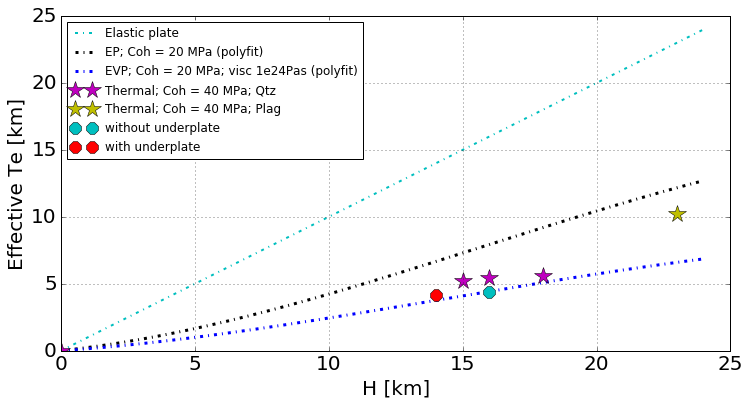

In [48]:
import os
import numpy as np
import math 
import matplotlib.pyplot as plt

# Money figure all togher
# EP case
H = [0,6,8,10,12,15,18,21]
HH = [0,24]

Te_xf = [0,2.19,3.11,4.2,5.24,7.12,9.19,10.41]
Te_gamma = [0,2.2,3.25,4.37,5.58,7.51,9.58,11.76]
Te_dx0 = [0,2.06,3.03,4.08,5.36,7.08,9.19,10.8]
Hd_array = [0,4.95,6.52,8.15,9.7,12.2,14.7,16.6]
Te_sum = [Te_xf[i]+Te_gamma[i]+Te_dx0[i] for i in range(len(Te_xf))]
Te_avg = [x / 3.0 for x in Te_sum]
Te = Te_avg
polyP_EP = np.polyfit(H,Te,3)
polyP_func_EP = np.poly1d(polyP_EP)
xp = np.linspace(0,24,500)
Tep_EP = polyP_func_EP(xp)


#EVP const thermal
H = [0,5,10,15,20]
#HH = [0,20]
Te = [0,0.641,2.325,3.866,5.976]
Te_xf = [0,1.28,2.5,4.1,5.57]
Te_gamma = [0,1.06,2.55,4.32,5.66]
Te_sum = [Te[i]+Te_xf[i]+Te_gamma[i] for i in range(len(Te))]
Te_avg_EVP = [x / 3.0 for x in Te_sum]


polyP_EVP = np.polyfit(H,Te_avg_EVP,3)
polyP_func_EVP = np.poly1d(polyP_EVP)
#xp = np.linspace(0,22,500)
Tep_EVP = polyP_func_EVP(xp)

#EVP-thermal
H_tm = [0, 15, 16, 18, 23]
Te_tm = [0, 5.2, 5.4, 5.6, 10.2]
#percentage_tm = [34.67,33.75,31.11]

#EVP-underplating
H_underplate = [16, 14]
Te_without_underpate = (4.17+3.57+5.54)/3.
Te_with_underplate = (4.07+3.81+4.69) / 3.
Te_underplate = [Te_without_underpate, Te_with_underplate]

# plotting
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.plot(HH,HH,'c-.',linewidth=2,label="Elastic plate")

#plotting EP
plt.plot(xp,Tep_EP,'k-.',linewidth=3,label="EP; Coh = 20 MPa (polyfit)")
#plt.plot(xp,TepC,'r-.',linewidth=3,label="EP; Coh = 40 MPa (polyfit)")
#plt.plot(H,TeC,'ro',markersize=17,label="EP; Coh = 40 MPa")
#plt.plot(H,Te,'ko',markersize=15,label="EP; Coh = 20 MPa" )

#Plotting EVP_const therm
plt.plot(xp,Tep_EVP,'b-.',linewidth=3,label="EVP; Coh = 20 MPa; visc 1e24Pas (polyfit)")
#plt.plot(H_EVP,Te_EVP,'bv',markersize=15,label="EVP; Coh = 20 MPa; visc 1e24Pas" )
#plt.plot(10,3.1,'rv',markersize=16,label="EVP; Coh = 20 MPa; visc 1e30Pas" )

#Plotting EVP_thermal tm
plt.plot(H_tm[:4],Te_tm[:4],'m*',markersize=18,label="Thermal; Coh = 40 MPa; Qtz" )
plt.plot(H_tm[4],Te_tm[4],'y*',markersize=18,label="Thermal; Coh = 40 MPa; Plag" )

#plotting EVP_underplating
plt.plot(H_underplate[0],Te_underplate[0],'c8',markersize=12,label="without underplate" )
plt.plot(H_underplate[1],Te_underplate[1],'r8',markersize=12,label="with underplate" )

#plt.title("Effective Te w.r.t. original plate thickness H\n",fontsize=20)
plt.xlabel("H [km]",fontsize=20)
plt.ylabel("Effective Te [km]",fontsize=20)
plt.grid()
plt.axis([0,25, 0, 25])
plt.legend(loc=2,fontsize=12)
plt.show()
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig.savefig(resources_path+'FINAL-$-updated.pdf', dpi=300)

In [49]:
resources_path

'/Users/Tian/Documents/Thesis_Columbia/!SDR_manuscript/manuscript-2018/figures/resources/'

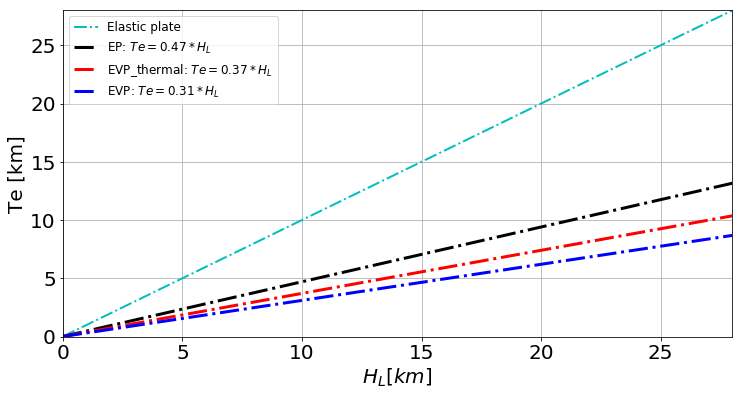

In [17]:
resources_path='/Users/Tian/Documents/Thesis_Columbia/SDR_manuscript/manuscript-2018/figures/resources/'
import os
import numpy as np
import math 
import matplotlib.pyplot as plt

# Money figure all togher
# EP case
HH = [0,28]
polyP_EP = ([0.47,0])
polyP_func_EP = np.poly1d(polyP_EP)
xp = np.linspace(0,28,500)
Tep_EP = polyP_func_EP(xp)

#EVP const thermal
polyP_EVP = ([0.31,0])
polyP_func_EVP = np.poly1d(polyP_EVP)
Tep_EVP = polyP_func_EVP(xp)

#EVP-thermal
polyP_EVP_tm = ([0.37,0])
polyP_func_EVP_tm = np.poly1d(polyP_EVP_tm)
Tep_EVP_tm =polyP_func_EVP_tm(xp)

# plotting
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.plot(HH,HH,'c-.',linewidth=2,label="Elastic plate")

#plotting EP
plt.plot(xp,Tep_EP,'k-.',linewidth=3,label="EP: $Te = 0.47 * H_{L}$")

#Plotting EVP_thermal tm
plt.plot(xp,Tep_EVP_tm,'r-.',linewidth=3,label="EVP_thermal: $Te = 0.37 * H_{L}$")

#Plotting EVP_const therm
plt.plot(xp,Tep_EVP,'b-.',linewidth=3,label="EVP: $Te = 0.31 * H_{L}$")
#plt.plot(H_EVP,Te_EVP,'bv',markersize=15,label="EVP; Coh = 20 MPa; visc 1e24Pas" )
#plt.plot(10,3.1,'rv',markersize=16,label="EVP; Coh = 20 MPa; visc 1e30Pas" )



#plt.title("Effective Te w.r.t. original plate thickness H\n",fontsize=20)
plt.xlabel("$H_L [km]$",fontsize=20)
plt.ylabel("Te [km]",fontsize=20)
plt.grid()
plt.axis([0,28, 0, 28])
plt.legend(loc=2,fontsize=12)
plt.show()
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig.savefig(resources_path+'FINAL-$-updated.pdf', dpi=300)

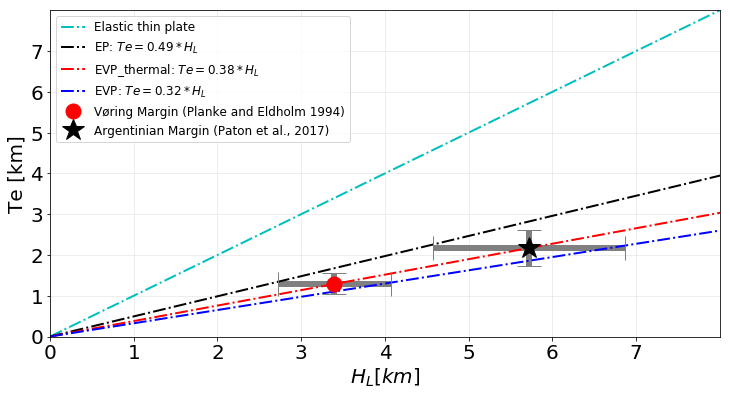

In [84]:
resources_path='/Users/Tian/Documents/Thesis_Columbia/SDR_manuscript/manuscript-2018/figures/resources/'
import os
import numpy as np
import math 
import matplotlib.pyplot as plt

# Money figure all togher
# EP case
HH = [0,28]
polyP_EP = ([0.4931,0])
polyP_func_EP = np.poly1d(polyP_EP)
xp = np.linspace(0,28,500)
Tep_EP = polyP_func_EP(xp)

#EVP const thermal
polyP_EVP = ([0.3247,0])
polyP_func_EVP = np.poly1d(polyP_EVP)
Tep_EVP = polyP_func_EVP(xp)

#EVP-thermal
polyP_EVP_tm = ([0.3792,0])
polyP_func_EVP_tm = np.poly1d(polyP_EVP_tm)
Tep_EVP_tm =polyP_func_EVP_tm(xp)

# plotting
fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.plot(HH,HH,'c-.',linewidth=2,label="Elastic thin plate")

#plotting EP
plt.plot(xp,Tep_EP,'k-.',linewidth=2,label="EP: $Te = 0.49 * H_{L}$")

#Plotting EVP_thermal tm
plt.plot(xp,Tep_EVP_tm,'r-.',linewidth=2,label="EVP_thermal: $Te = 0.38 * H_{L}$")

#Plotting EVP_const therm
plt.plot(xp,Tep_EVP,'b-.',linewidth=2,label="EVP: $Te = 0.32 * H_{L}$")
#plt.plot(H_EVP,Te_EVP,'bv',markersize=15,label="EVP; Coh = 20 MPa; visc 1e24Pas" )
#plt.plot(10,3.1,'rv',markersize=16,label="EVP; Coh = 20 MPa; visc 1e30Pas" )

plt.plot(1.288/0.3792,1.288,'ro',Markersize=15,label="Vøring Margin (Planke and Eldholm 1994)")
plt.errorbar(1.288/0.3792,1.288, yerr=0.2*1.288,xerr=0.2*1.288/0.3792, fmt='k',capsize=12,ecolor='gray', elinewidth=6);
plt.plot(2.169/0.3792,2.169,'k*',Markersize=23,label="Argentinian Margin (Paton et al., 2017)")
plt.errorbar(2.169/0.3792,2.169, yerr=0.2*2.169,xerr=0.2*2.169/0.3792, fmt='k',capsize=12,ecolor='gray', elinewidth=6);
#plt.title("Effective Te w.r.t. original plate thickness H\n",fontsize=20)
plt.xlabel("$H_L [km]$",fontsize=20)
plt.ylabel("Te [km]",fontsize=20)
plt.xticks(np.arange(0, 8, 1))
plt.yticks(np.arange(0, 8, 1))
plt.grid(alpha=0.28)
plt.axis([0,8, 0, 8])
plt.legend(loc=2,fontsize=12)
plt.show()
import matplotlib
matplotlib.rc('xtick', labelsize=20) 
matplotlib.rc('ytick', labelsize=20)

fig.savefig(resources_path+'FINAL-$-with_PSDM_data.pdf', dpi=300)

In [14]:
1.288/0.3792

3.3966244725738397

In [15]:
2.169/0.3792

5.71993670886076

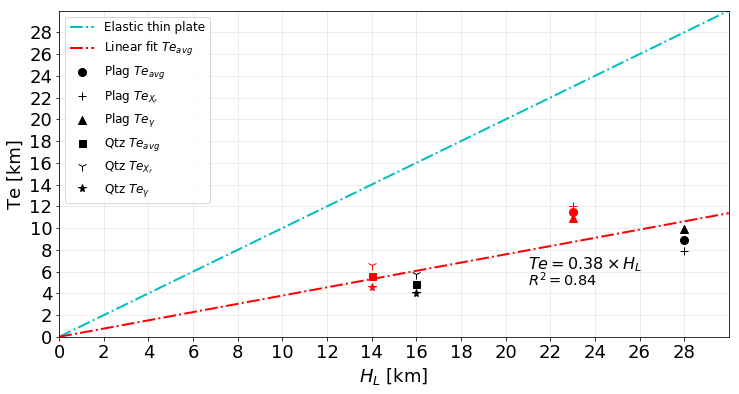

In [82]:
import os
import numpy as np
import math 
import matplotlib.pyplot as plt
resources_path="/Users/Tian/Documents/Thesis_Columbia/SDR_manuscript/manuscript-2018/figures/resources/"


H = np.array([0,14,16,23,28])
HH = [0,30]
Te_xf = np.array([0,6.6,5.8,12.0,7.9])
Te_gamma = np.array([0,4.6,4.0,10.9,9.9])
Te_sum = Te_xf + Te_gamma
Te = Te_sum/2

polyP = np.polyfit(H,Te_avg,1)
polyP2 = ([0.3792, 0])
polyP_func = np.poly1d(polyP)
polyP_func2 = np.poly1d(polyP2)
xp = np.linspace(0,30,500)
Tep = polyP_func(xp)
Tep2 = polyP_func2(xp)
#y_test = polyP[0]*xp**3 + polyP[1]*xp**2 + polyP[2]*xp**1 + polyP[3]*xp**0

fig = plt.gcf()
fig.set_size_inches(12, 6)
plt.plot(HH,HH,'c-.',linewidth=2,label="Elastic thin plate")

plt.plot(xp,Tep2,'r-.',linewidth=2,label="Linear fit $Te_{avg}$")

#plot1,=plt.plot(H[1:3],Te[1:3],'ko',markersize=22,label="$Te_{avg}$" )
#plt.plot(H[1:3],Te_xf[1:3],'r*',markersize=20,label="$Te_{X_f}$" )
#plt.plot(H[1:3],Te_gamma[1:3],'g^',markersize=12,label="$Te_{\gamma}$" )

plot1,=plt.plot(H[3:4],Te[3:4],'ro',markersize=8 )
plt.plot(H[4:5],Te[4:5],'ko',markersize=8,label="Plag $Te_{avg}$" )
plt.plot(H[3:4],Te_xf[3:4],'r+',markersize=8 )
plt.plot(H[4:5],Te_xf[4:5],'k+',markersize=8,label="Plag $Te_{X_f}$" )
plt.plot(H[3:4],Te_gamma[3:4],'r^',markersize=8 )
plt.plot(H[4:5],Te_gamma[4:5],'k^',markersize=8,label="Plag $Te_{\gamma}$" )

plot1,=plt.plot(H[1:2],Te[1:2],'rs',markersize=7 )
plt.plot(H[2:3],Te[2:3],'ks',markersize=7,label="Qtz $Te_{avg}$" )
plt.plot(H[1:2],Te_xf[1:2],'r1',markersize=9 )
plt.plot(H[2:3],Te_xf[2:3],'k1',markersize=9,label="Qtz $Te_{X_f}$" )
plt.plot(H[1:2],Te_gamma[1:2],'r*',markersize=8 )
plt.plot(H[2:3],Te_gamma[2:3],'k*',markersize=8,label="Qtz $Te_{\gamma}$" )

# plot1,=plt.plot(H[3:4],Te[3:4],'ro',markersize=8,label="$Te_{avg}$" )
# plt.plot(H[4:5],Te[4:5],'ko',markersize=8,label="$Te_{avg}$" )
# plt.plot(H[3:4],Te_xf[3:4],'r+',markersize=8,label="$Te_{X_f}$" )
# plt.plot(H[4:5],Te_xf[4:5],'k+',markersize=8,label="$Te_{X_f}$" )
# plt.plot(H[3:4],Te_gamma[3:4],'r^',markersize=8,label="$Te_{\gamma}$" )
# plt.plot(H[4:5],Te_gamma[4:5],'k^',markersize=8,label="$Te_{\gamma}$" )


import matplotlib
matplotlib.rc('xtick', labelsize=18) 
matplotlib.rc('ytick', labelsize=18)

plt.text(21,6.2, r'$Te = 0.38 \times H_{L}$', fontsize=16)
plt.text(21.,4.7, r'$R^{2} = 0.84$', fontsize=14.5)
plt.xticks(np.arange(min(H), 30, 2))
plt.yticks(np.arange(min(H), 30, 2))
#plt.title("Effective Te w.r.t. original plate thickness H (newtonian case)",fontsize=20)
plt.xlabel("$H_L$ [km]",fontsize=18)
plt.ylabel("Te [km]",fontsize=18)
plt.grid(alpha=0.28)
plt.axis([0,30, 0, 30])
plt.legend(loc=2,fontsize=12)
plt.show()

fig.savefig(resources_path+'EVP_thermal20190222-Te_H-$.pdf', dpi=300)

In [38]:
Te_xf = np.array([0,6.6,5.8,12.0,7.9])
Te_gamma = np.array([0,4.6,4.0,10.9,9.9])
Te_sum = Te_xf + Te_gamma
Te_avg = Te_sum/2

In [40]:
Te_avg

array([  0.  ,   5.6 ,   4.9 ,  11.45,   8.9 ])